# Линейная регрессия и основные библиотеки Python для анализа данных и научных вычислений

## Задание 1. Первичный анализ данных c Pandas

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

 Посмотрите на первые 5 записей с помощью метода *head* Pandas DataFrame. Нарисуйте гистограмму распределения веса с помощью метода *plot* Pandas DataFrame. Сделайте гистограмму зеленой, подпишите картинку.

In [3]:
data = pd.read_csv('rost.csv', index_col='Index')
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<Axes: title={'center': 'Height (inch.) distribution'}, ylabel='Frequency'>

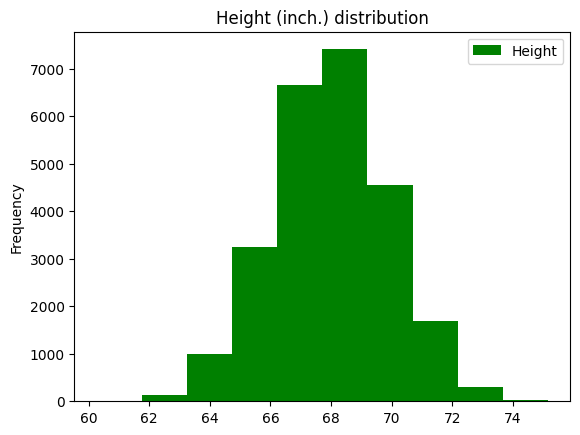

In [4]:
data.plot(y='Height', kind='hist',color='green', title='Height (inch.) distribution')

Чтобы проиллюстрировать этот метод, интересней добавить третий признак. Создадим признак *Индекс массы тела* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого воспользуемся удобной связкой метода *apply* Pandas DataFrame и lambda-функций Python

In [5]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [6]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], row['Weight']), axis=1)

Постройте картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга. Используйте метод *pairplot* библиотеки Seaborn.

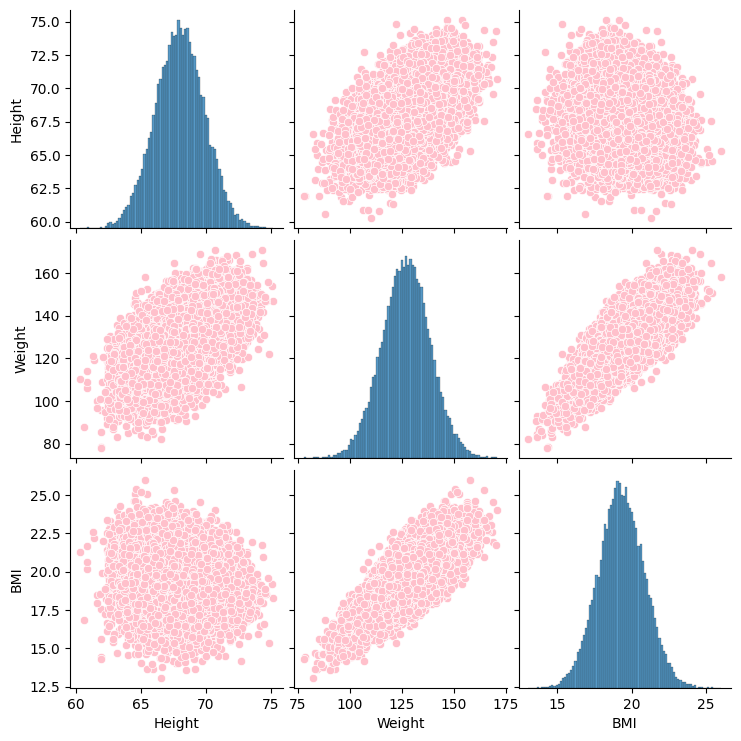

In [7]:
plot_kws = {'color': 'pink'}
sns.pairplot(data, plot_kws=plot_kws)
plt.show()

Создайте в DataFrame *data* новый признак *weight_category*, который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 3 - если вес  больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. Постройте «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории. Используйте метод *boxplot* библиотеки Seaborn и метод *apply* Pandas DataFrame. Подпишите ось *y* меткой «Рост», ось *x* – меткой «Весовая категория».


In [8]:
def weight_category(weight):
  bins = [-float('inf'), 120, 150, float('inf')]
  return np.digitize(weight, bins=bins)

In [9]:
data['weight_cat'] = data['Weight'].apply(weight_category)

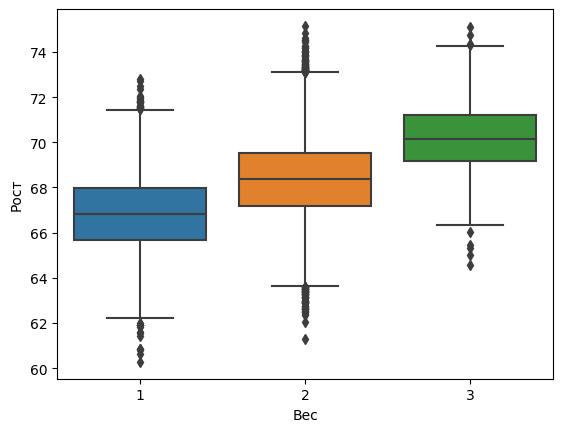

In [10]:
dataBoxplot = sns.boxplot(x='weight_cat', y='Height', data=data)
dataBoxplot.set(xlabel='Вес', ylabel='Рост')
plt.show()

Постройте scatter plot зависимости роста от веса, используя метод *plot* для Pandas DataFrame с аргументом *kind='scatter'*. Подпишите картинку.

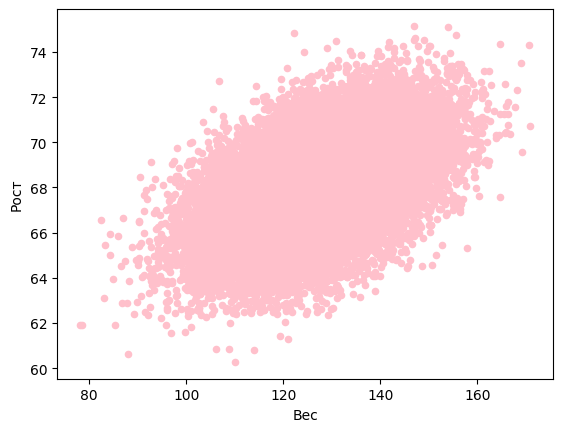

In [11]:
dataPlot=data.plot(x='Weight', y='Height', kind='scatter', color='pink')
dataPlot.set(xlabel='Вес', ylabel='Рост')
plt.show()

## Задание 2. Минимизация квадратичной ошибки

Напишите функцию, которая по двум параметрам $w_0$ и $w_1$ вычисляет квадратичную ошибку приближения зависимости роста $y$ от веса $x$ прямой линией $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Здесь $n$ – число наблюдений в наборе данных, $y_i$ и $x_i$ – рост и вес $i$-ого человека в наборе данных.

In [12]:
def quadratic_error(w0, w1):
  error = (data.Height - (w0+w1*data.Weight))**2
  return error.sum()

Проведите на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров ($w_0, w_1) = (60, 0.05)$ и ($w_0, w_1) = (50, 0.16)$. Используйте метод *plot* из *matplotlib.pyplot*, а также метод *linspace* библиотеки NumPy. Подпишите оси и график.

In [13]:
functionLine = lambda x, w0, w1: w0+w1*x
arrayPoints = 100
arrayX = np.linspace(0, 200, arrayPoints)
arrayW = np.array([[60, 0.05], [50, 0.16]])
rowsW, columnsW = arrayW.shape
arrayY = functionLine(arrayX[:, np.newaxis], arrayW[:, 0], arrayW[:, 1])

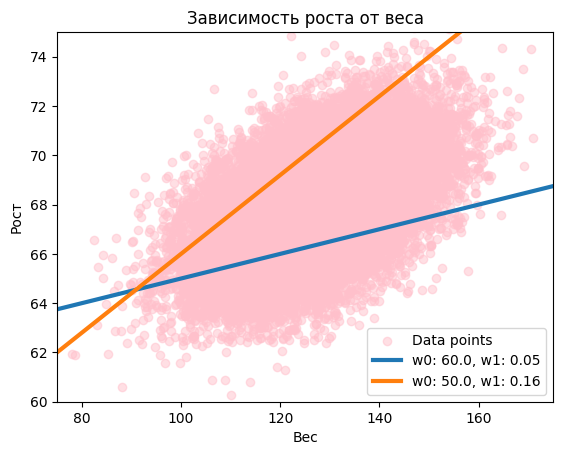

In [14]:

plt.scatter(data.Weight, data.Height, alpha=0.5, c='pink', label='Data points')
for i in range(rowsW):
    text = 'w0: ' + str(arrayW[i, 0]) + ', w1: ' + str(arrayW[i, 1])
    plt.plot(arrayX, arrayY[:, i], linewidth=3.0, label=text)
plt.legend()
plt.axis( [75, 175, 60, 75] )
plt.title('Зависимость роста от веса')
plt.xlabel('Вес')
plt.ylabel('Рост')

plt.show()

Постройте график зависимости функции ошибки от параметра $w_1$ при $w_0$ = 50. Подпишите оси и график.

In [15]:
dataR, dataC = data.shape
arrayW1 = np.linspace(-5., 5., dataR)
errorW1 = np.zeros( dataR )
for i in range(dataR):
    errorW1[i] = quadratic_error(50., arrayW1[i])

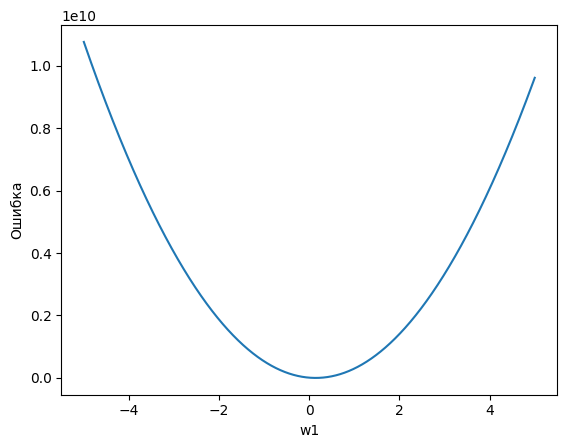

In [16]:
plt.plot(arrayW1, errorW1)
plt.xlabel('w1')
plt.ylabel('Ошибка')
plt.show()

С помощью метода *minimize_scalar* из *scipy.optimize* найдите минимум функции, определенной в п. 6, для значений параметра  $w_1$ в диапазоне [-5,5]. Проведите на графике из п. 5 Задания 1 прямую, соответствующую значениям параметров ($w_0$, $w_1$) = (50, $w_1\_opt$), где $w_1\_opt$ – найденное в п. 8 оптимальное значение параметра $w_1$.

In [17]:
optimW1 = minimize_scalar(lambda w: quadratic_error(50., w), bounds=(-5, 5))
optimW1_ = optimW1.x
optimW1_

0.14109203728834374

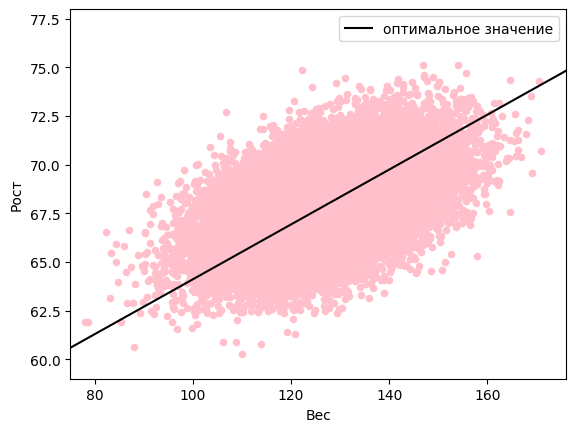

In [23]:
optLines = np.array(functionLine(arrayX, 50., optimW1_))

plotData = data.plot(x='Weight', y='Height', kind='scatter', c='pink')
plotData.set(xlabel='Вес', ylabel='Рост')
plt.plot(arrayX, optLines, c='black', label='оптимальное значение')
plt.legend()
plt.axis([75, 176, 59, 78])

plt.show()

Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров $w_0$ и $w_1$. Подпишите ось $x$ меткой «Intercept», ось $y$ – меткой «Slope», a ось $z$ – меткой «Error».

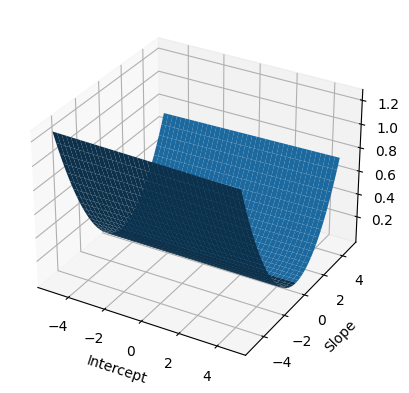

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
error = np.vectorize(quadratic_error)
Z = np.array( error(X.ravel(), Y.ravel()) )
Z.shape = X.shape

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

С помощью метода *minimize* из scipy.optimize найдите минимум функции, определенной в п. 6, для значений параметра $w_0$ в диапазоне [-100,100] и $w_1$ - в диапазоне [-5, 5]. Начальная точка – ($w_0$, $w_1$) = (0, 0). Используйте метод оптимизации L-BFGS-B (аргумент method метода minimize). Проведите на графике из п. 5 Задания 1 прямую, соответствующую найденным оптимальным значениям параметров $w_0$ и $w_1$. Подпишите оси и график.

In [30]:
errorOneArg = lambda w: quadratic_error(w[0], w[1])
borders = ((-100., 100.), (-5., 5.))
x0 = (0., 0.)
optimRes = minimize(errorOneArg, x0, bounds=borders, method='L-BFGS-B')
optw0 = optimRes.x[0]
optw1 = optimRes.x[1]

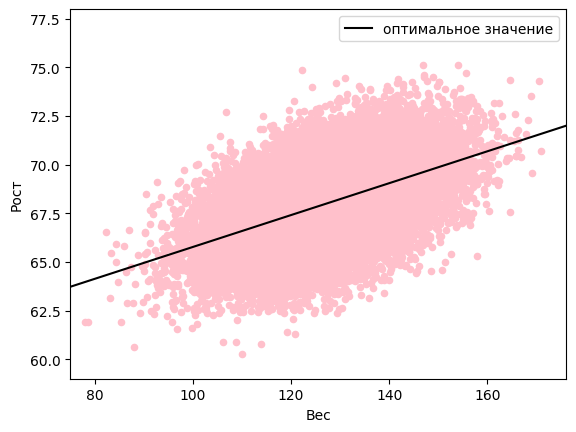

In [32]:
linesY = np.array(functionLine(arrayX, optw0, optw1))

dataPlot = data.plot(x='Weight', y='Height', kind='scatter', c='pink')
dataPlot.set(xlabel=u'Вес', ylabel=u'Рост')

plt.plot(arrayX, linesY, c='black', label='оптимальное значение')
plt.legend()
plt.axis([75, 176, 59, 78])

plt.show()
